<a href="https://colab.research.google.com/github/SaketMunda/cnn-computer-vision-introduction/blob/master/convolutional_neural_network_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow
Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes(pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or beter yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the zip file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-11-23 04:13:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 173.194.202.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   172MB/s    in 0.6s    

2022-11-23 04:13:58 (172 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

There we go, we have all the images of steak and pizza available in their directory which represents our class names.

In [2]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [3]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [4]:
# Let's visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}") # Show the shape of the image

  return img

['168879.jpg']
Image Shape: (384, 512, 3)


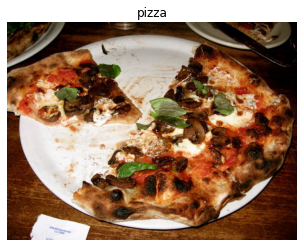

In [ ]:
# view a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [ ]:
img.shape

(384, 512, 3)

It says, that height of the image is 384, width is 512 and 3 color channels (RGB)

In [ ]:
# view the image
img

array([[[132, 145, 125],
        [137, 154, 135],
        [143, 168, 149],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]],

       [[126, 143, 125],
        [132, 153, 136],
        [141, 169, 154],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]],

       [[128, 152, 139],
        [133, 159, 148],
        [138, 171, 160],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[139, 189, 196],
        [138, 188, 195],
        [136, 189, 195],
        ...,
        [136, 155, 135],
        [135, 153, 131],
        [132, 150, 128]],

       [[140, 190, 197],
        [139, 189, 196],
        [138, 188, 195],
        ...,
        [130, 149, 129],
        [130, 149, 129],
        [127, 146, 124]],

       [[140, 189, 196],
        [138, 188, 195],
        [137, 187, 194],
        ...,
        [122, 141, 121],
        [124, 143, 123],
        [122, 141, 119]]

It seems the image is now converted to array of numbers with random numbers, but if every vector(row) represents pixel, then each pixel has it's own RGB value, therefor, each number would range between 0~255.

In [ ]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[132, 145, 125],
        [137, 154, 135],
        [143, 168, 149],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]],

       [[126, 143, 125],
        [132, 153, 136],
        [141, 169, 154],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]],

       [[128, 152, 139],
        [133, 159, 148],
        [138, 171, 160],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[139, 189, 196],
        [138, 188, 195],
        [136, 189, 195],
        ...,
        [136, 155, 135],
        [135, 153, 131],
        [132, 150, 128]],

       [[140, 190, 197],
        [139, 189, 196],
        [138, 188, 195],
        ...,
        [130, 149, 129],
        [130, 149, 129],
        [127, 146, 124]],

       [[140, 189, 196],
        [138, 188, 195],
        [137, 187, 194],
        ...,
        [122, 141, 12

> **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value)

In [ ]:
# Get all the pixel values between 0 & 1 (scale/normalize the data, as neural networks love values between 0 & 1)
img / 255

array([[[0.51764706, 0.56862745, 0.49019608],
        [0.5372549 , 0.60392157, 0.52941176],
        [0.56078431, 0.65882353, 0.58431373],
        ...,
        [0.00784314, 0.        , 0.00392157],
        [0.00784314, 0.        , 0.00392157],
        [0.00784314, 0.        , 0.00392157]],

       [[0.49411765, 0.56078431, 0.49019608],
        [0.51764706, 0.6       , 0.53333333],
        [0.55294118, 0.6627451 , 0.60392157],
        ...,
        [0.00784314, 0.        , 0.00392157],
        [0.00784314, 0.        , 0.00392157],
        [0.00784314, 0.        , 0.00392157]],

       [[0.50196078, 0.59607843, 0.54509804],
        [0.52156863, 0.62352941, 0.58039216],
        [0.54117647, 0.67058824, 0.62745098],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.54509804, 0.74117647, 0.76862745],
        [0.54117647, 0.7372549 , 0.76470588],
        [0.53333333, 0

## An end-to-end example

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep mind.

Reading the [original dataset authors paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), we see they used a [Random Forest machine learning model](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d) and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

> 🔑 **Note**: A **baseline** is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

The code in the following cell replicates and end-to-end way to model our `pizza_steak` dataset with a convolutional neural network (CNN) using the components listed above.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/)

> 📖 **Resource**: The architecture we're using below is a scaled-down version of [VGG-16](https://arxiv.org/abs/1505.06798), a convolutional neural network which came 2nd in the 2014 [ImageNet classification competition](http://image-net.org/)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(17)

# Preprocess the data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224,224), # convert all images to be 224 x 224
                                               class_mode='binary', # type of problem we're working on
                                               seed=17)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=17)

# Create a CNN model (same as Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3, # can also be (3,3)
                           activation='relu',
                           input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, color channels)
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2,2)
                              padding='valid'), # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid') # binary activation output
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 209ms/step - loss: 0.7064 - accuracy: 0.6193 - val_loss: 0.5388 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4954 - accuracy: 0.7833 - val_loss: 0.5414 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4720 - accuracy: 0.7940 - val_loss: 0.3723 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4215 - accuracy: 0.8107 - val_loss: 0.3848 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 15s 328ms/step - loss: 0.3972 - accuracy: 0.8393 - val_loss: 0.3461 - val_accuracy: 0.8520


Nice ! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~86% accuracy on the training set and ~85% accuracy on the test set).

However, our model only went through a binary classification problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

Before we dive into the concepts of CNN models and breaking down further, let's see what happens if we try to fit a model we've worked with previously to our data. Particularly Dense layers.

## Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.


We can use all of the same parameters in our previous model except for changing two things:

- **The data** - we're working with images instead of dots.
- **The input shape** - we have to tell our neural network the shape of the images we're working with.
  - A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [ ]:
# set the random seed
tf.random.set_seed(17)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


# fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 0.8817 - accuracy: 0.4947 - val_loss: 0.7029 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6897 - accuracy: 0.5047 - val_loss: 0.6811 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6791 - accuracy: 0.5400 - val_loss: 0.6721 - val_accuracy: 0.5640
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6690 - accuracy: 0.6320 - val_loss: 0.6591 - val_accuracy: 0.6760
Epoch 5/5
47/47 [==============================] - 13s 275ms/step - loss: 0.6545 - accuracy: 0.6753 - val_loss: 0.6398 - val_accuracy: 0.6840


Our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification is as good as guessing.

Let's see the architecture.

In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 4)                 602116    
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


One of the most noticeable things here is the much larger number of parameters in `model_2` compared to CNN `model_1`

`model_2` just have twice as the number of params in `model_1` and still performing worse.

> 🔑 **Note**: You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better. And in some cases it is. But in this case, the different here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image.

Since our previous model didn't work, what about increasing the number of layers and their neurons ?

> 🔑 **Note**: Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of our model.

In [ ]:
# set the random seed
tf.random.set_seed(17)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 187ms/step - loss: 2.4040 - accuracy: 0.6220 - val_loss: 0.8533 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.7784 - accuracy: 0.7033 - val_loss: 1.1727 - val_accuracy: 0.6080
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6384 - accuracy: 0.7467 - val_loss: 0.4770 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 12s 255ms/step - loss: 0.4883 - accuracy: 0.7707 - val_loss: 0.4301 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 11s 233ms/step - loss: 0.5475 - accuracy: 0.7607 - val_loss: 0.4571 - val_accuracy: 0.7640


Looks like our model is learning again. It got ~75% accuracy on the training set and ~75% accuracy on validation set.

Let's view the architecture,

In [ ]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 100)               15052900  
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


The number of trainable parameters has increased even more than `model_2`. And even with close to 500x (~15,000,000 vs ~ 30,000) more trainable parameters, `model_3` still doesn't out perform `model_1`.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## Binary Classification: Let's break it down

We just went through a whirlwind of steps:
1. Becoming one with the data (visualize, visualize, visualize..)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a benchmark/baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your benchmark)
7. Repeat until satisfied




### 1. Becoming one with the data

Whatever kind of data you're dealing with, it's a good idea to visualize at least 10~100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

['2254705.jpg']
Image Shape: (512, 512, 3)
['394049.jpg']
Image Shape: (512, 382, 3)


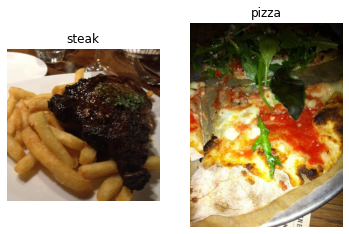

In [ ]:
# visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data separated into `train` and `test` directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [5]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

- 10,000 images (or more) might not fit into memory of your processor (GPU)
- Trying to learn patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20)

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of `ImageDataGenerator` for each of our datasets.

In [6]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've notices the `rescale` parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values are between 0 and 255.

The `rescale` parameter, along with `1/255.` is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).


Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the `flow_from_directory` method.

In [11]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             (224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.

In [ ]:
# See how many batches for Training set
1500/32, len(train_data)

(46.875, 47)

In [ ]:
# How many batches for test set
500/32, len(test_data)

(15.625, 16)

In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels

In [ ]:
# It should load the 32 images
len(images), len(labels)

(32, 32)

Let's see what the images look like.

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.07058824, 0.04705883, 0.04705883],
          [0.0627451 , 0.04705883, 0.04313726],
          [0.05882353, 0.04313726, 0.03921569],
          ...,
          [0.6313726 , 0.6156863 , 0.57254905],
          [0.6156863 , 0.6039216 , 0.54509807],
          [0.6039216 , 0.5921569 , 0.53333336]],
 
         [[0.0509804 , 0.03529412, 0.03137255],
          [0.05490196, 0.03921569, 0.03529412],
          [0.05882353, 0.05490196, 0.04705883],
          ...,
          [0.63529414, 0.6392157 , 0.58431375],
          [0.6392157 , 0.6431373 , 0.5803922 ],
          [0.60784316, 0.6117647 , 0.5411765 ]],
 
         [[0.0509804 , 0.04705883, 0.03921569],
          [0.04705883, 0.04313726, 0.03529412],
          [0.0509804 , 0.04705883, 0.03921569],
          ...,
          [0.6392157 , 0.654902  , 0.59607846],
          [0.63529414, 0.6509804 , 0.5921569 ],
          [0.5921569 , 0.60784316, 0.5411765 ]],
 
         ...,
 
         [[0.12941177, 0.2784314 , 0.36862746],
          [0.14509

Due to our `rescale` parameter, the images are now in form of tensors with values between 0 and 1, and because of the `target_size`, it's shape is `(224, 224, 3)`

How about the labels ?

In [ ]:
# View the first batch of the labels
labels

array([0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
      dtype=float32)

Due to `class_mode` parameter being `binary` our labels are either `0` (pizza) or `1` (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.

### 3. Create a model (start with a baseline)

You might be wondering what our default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on [ImageNet](https://www.image-net.org/) (a large collection of diverse images to benchmark different computer vision models)

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

> 🔑 **Note**: In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.


In our case, let's take a smaller version of the model that can be bound on the [CNN explainer website](https://poloclub.github.io/cnn-explainer/) (`model 1` from above) and build a 3 layer CNN.

In [8]:
# Make the creating of our model little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be our baseline, a 3 layer CNN)
model_4 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        strides=1,
        padding='valid',
        activation='relu',
        input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # Output layer (specify output shape)    
])

Great ! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

`Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output`

Let's discuss some of the components of the `Conv2D` layer:

- The `2D` means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel individually.
- `filters` - these are the number of "feature extractors" that will be moving over our images.
- `kernel_size` - the size of our filters, for example, a kernel_size of (3, 3)(or just 3) will mean each filter will have the size 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
- `strides` - the number of pixels a `filter` will move across as it covers the image. A `strides` of 1 means the filter moves across each pixel 1 by 1. A `strides` of 2 means it moves 2 pixels at a time.
- `padding` - this can be either `'same'` or `'valid'`, `'same'` add zeros to the outside of the image so the resulting output of the convolutional layer is the same as the input, where as `'valid'`(default) cuts off excess pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end).


What's a "feature" ?


A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by us, instead, the model learns them as it applied different filters across the image.


> 📖 **Resources**: For a great demonstration of these in action, be sure to spend some time going through the following:
- [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - a great visual overview of many of the concepts we're replicating here with code.
- [A guide to convolutional arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
- For a great explanation of padding, see this [Stack overflow answer](https://stackoverflow.com/a/39371113/7900723)


Now our model is ready, let's compile it.

In [ ]:
# compile the model
model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit the model

Our model is compiled, time to fit it.

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 213ms/step - loss: 0.6869 - accuracy: 0.7073 - val_loss: 0.3887 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 13s 273ms/step - loss: 0.4367 - accuracy: 0.7947 - val_loss: 0.3639 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 13s 283ms/step - loss: 0.2813 - accuracy: 0.8960 - val_loss: 0.3373 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 14s 293ms/step - loss: 0.1507 - accuracy: 0.9493 - val_loss: 0.5148 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 12s 267ms/step - loss: 0.0930 - accuracy: 0.9707 - val_loss: 0.4144 - val_accuracy: 0.8200


- `steps_per_epoch` : This is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data`
- `validation_steps` : Same as above, but for `validation_data`

Looks like that our model is learning something, let's evaluate it.

### 5. Evaluate the model

Let's check out its training curves.

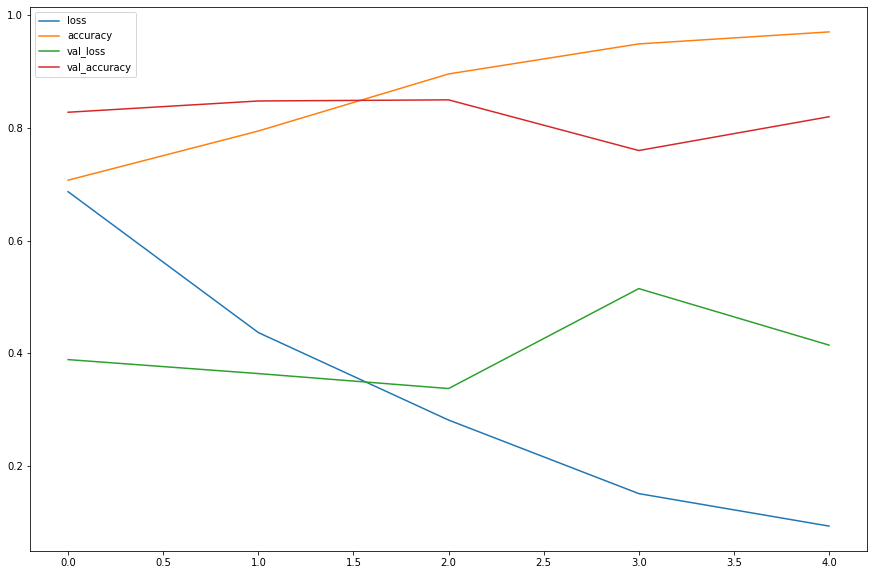

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(15, 10));

Judging by our loss curves, it loooks like our model is **overfitting** the training dataset.

> 🔑 **Note**: When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

Let's separate the accuracy and loss curves.

In [7]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(loss))

  # Plot the losses
  plt.plot(epochs, loss, label="Training loss")
  plt.plot(epochs, val_loss, label="Validation loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()


  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy,label="Training accuracy")
  plt.plot(epochs, val_accuracy, label="Validation accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

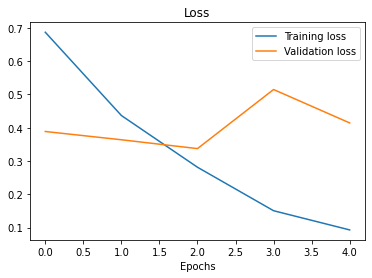

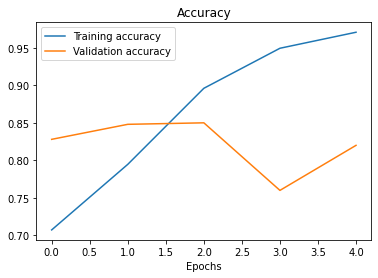

In [ ]:
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [ ]:
# Check out the model's architecture
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:
- Increase the number of convolution layers
- Increase the number of filters in each convolution layers
- Add another dense layer to the output of our flattened layer

But we'll focus on reducing the overfitting, and getting our model's training curves to better align with validation curves.

Why is reducing overfitting is important ?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Reduce overfitting can be done in some ways like:
- Add data augmentation
- Add regularization layers (Such as MaxPool2D)
- Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **Regularization**

#### Regularization Layers

In [9]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # input layer
    MaxPool2D(pool_size=2), # reduce the number of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

**`Conv2D`** layers identifies the features of the image and **`MaxPool2D`** layer consider the most important feature among those features by taking out `max()`

In [12]:
# Compile a model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 19s 205ms/step - loss: 0.6082 - accuracy: 0.6873 - val_loss: 0.4812 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4633 - accuracy: 0.7880 - val_loss: 0.3758 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4350 - accuracy: 0.8047 - val_loss: 0.3496 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4056 - accuracy: 0.8220 - val_loss: 0.3314 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3976 - accuracy: 0.8300 - val_loss: 0.3476 - val_accuracy: 0.8720


It looks like our model with max pooling(`model_5`) is performing worse on training set but better on validation set.

Let's see the architecture of the model and plot the training curves.

In [13]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

If we notice, in every max_pool layer, the number of shapes is just halved from the previous Conv layer, because it's just considering the important feature to consider.

Also comparing the number of params `model_5` is learning is 50x lesser than `model_4` params but still performing competitive.

> 🔑 **Note**: The bigger the `pool_size` parameter, the more max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

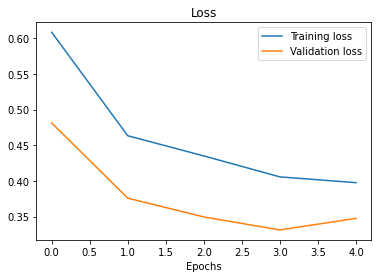

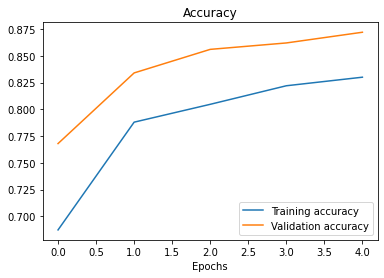

In [14]:
# let's check the training curves
plot_loss_curves(history_5)

Nice !, we can see the training curves get a lot closer to each other. However, our validation loss looks to start increasing towards the end and in turn potentially leaning to overfitting.

Let's try another method of overfitting prevention, Data Augmentation.



#### Data Augmentation

To implement data augmentation we have to reinstantiate `ImageDataGenerator`

In [15]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom the image
                                             height_shift_range=0.2, # shift the image on y axis
                                             width_shift_range=0.2, # shift the image on x axis
                                             horizontal_flip=True) # flip the image on horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# CReate ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question** : What is Data Augmentation ?

**Data Augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> 🔑 **Note** : Data augmentation is usually only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [16]:
# Import the data and augment it from training directory
print("Augmented Training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   shuffle=False, # Don't shuffle for demonstration purpose
                                                                   batch_size=32)

# Create non-augmented data
print("Non-augmented Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               shuffle=False,
                                               batch_size=32)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Augmented Training images:
Found 1500 images belonging to 2 classes.
Non-augmented Training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Let's visualize it, and see the difference between augmented and non-augmented training samples

In [17]:
# Get the data batches samples
images, labels = train_data.next()
images_augmented, labels_augmented = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

5


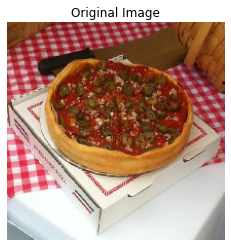

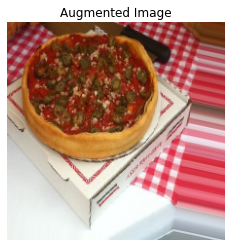

In [23]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 32) # We're making batches of size 32, so we'll get a random instance
print(random_number)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(images_augmented[random_number])
plt.title("Augmented Image")
plt.axis(False);

After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less than perfect images, which is often the case when using real-world images.

> 🤔 **Question**: Should I use data augmentation ? And how much should I augment ?

Data augmentation is a way to try and prevent model overfitting. If your model is overfitting (e.g the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the `ImageDataGenerator` class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as `model_5`

In [25]:
# create the model
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 566ms/step - loss: 0.7178 - accuracy: 0.4207 - val_loss: 0.6900 - val_accuracy: 0.5900
Epoch 2/5
47/47 [==============================] - 28s 602ms/step - loss: 0.6960 - accuracy: 0.4793 - val_loss: 0.6885 - val_accuracy: 0.5800
Epoch 3/5
47/47 [==============================] - 29s 628ms/step - loss: 0.6927 - accuracy: 0.5240 - val_loss: 0.6793 - val_accuracy: 0.6440
Epoch 4/5
47/47 [==============================] - 24s 512ms/step - loss: 0.6925 - accuracy: 0.5687 - val_loss: 0.6680 - val_accuracy: 0.5320
Epoch 5/5
47/47 [==============================] - 24s 517ms/step - loss: 0.7077 - accuracy: 0.6213 - val_loss: 0.6480 - val_accuracy: 0.7200


> 🤔 **Question**: Why didn't our model get very good results on the training set to begin with ?

It's because we created `train_data_augmented` we turned off data shuffling using `shuffle=False` which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measure on only a single class rather than both classes. The validation data performance improves steadily becasuse it contains shuffled data.

Some more about data augmentation : https://www.tensorflow.org/tutorials/images/data_augmentation

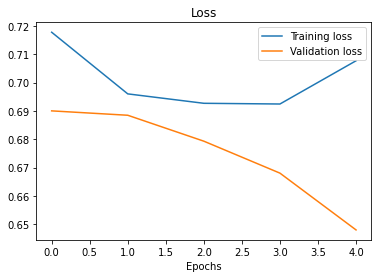

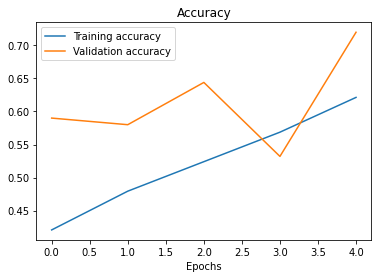

In [26]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

The most ideal loss curves isn't too spiky but a smooth descent, however, a perfectly smooth loss curve is the equivalent of a fairytale

Let's see what happens when we shuffle the augmented training data

In [27]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [30]:
# CReate the model same as model_5 and model_6
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 32s 686ms/step - loss: 0.6383 - accuracy: 0.6227 - val_loss: 0.5375 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5301 - accuracy: 0.7327 - val_loss: 0.4281 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 29s 617ms/step - loss: 0.4910 - accuracy: 0.7707 - val_loss: 0.3907 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 30s 639ms/step - loss: 0.4964 - accuracy: 0.7633 - val_loss: 0.3653 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 24s 511ms/step - loss: 0.4714 - accuracy: 0.7880 - val_loss: 0.3956 - val_accuracy: 0.8220


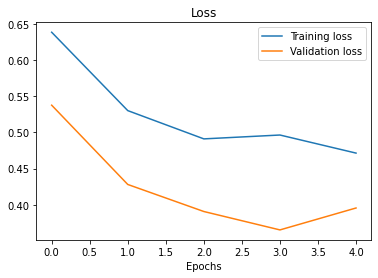

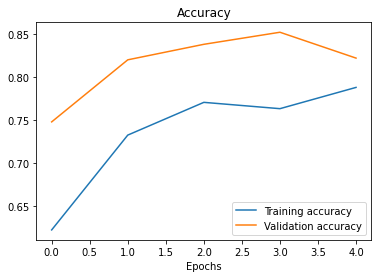

In [31]:
# Check model's performance history training on augmented shuffled data
plot_loss_curves(history_7)

Notice with `model_7` how the performance on the training dataset improves almost immediately compared to `model_6`. This is because we shuffled the training data as we passed it to the model using the parameter `shuffle=True` in the `flow_from_directory` method.

Also, our loss curves look a little bit smoother with shuffled data.